# Phân vùng ảnh dựa vào biên


In [12]:
import cv2
from matplotlib import pyplot as plt

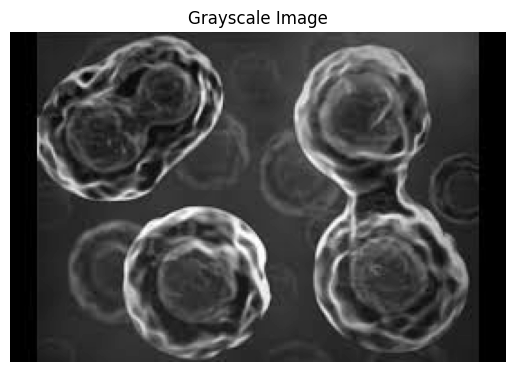

In [13]:
# Read the image in grayscale
image = cv2.imread('../data/color_cell.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image was successfully loaded
if image is None:
    print("Error: Could not load image.")
else:
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')  # Hide axis
    plt.show()

In [14]:
import numpy as np

In [15]:

gray_level,frequency = np.unique(image, return_counts=True)
fre = dict(zip(gray_level, frequency))
fre

{0: 4434,
 1: 367,
 2: 293,
 3: 180,
 4: 135,
 5: 47,
 6: 22,
 7: 22,
 8: 18,
 9: 12,
 10: 20,
 11: 17,
 12: 34,
 13: 25,
 14: 36,
 15: 37,
 16: 60,
 17: 60,
 18: 69,
 19: 90,
 20: 97,
 21: 98,
 22: 110,
 23: 127,
 24: 106,
 25: 127,
 26: 161,
 27: 170,
 28: 188,
 29: 265,
 30: 318,
 31: 434,
 32: 480,
 33: 477,
 34: 537,
 35: 535,
 36: 533,
 37: 555,
 38: 777,
 39: 764,
 40: 818,
 41: 791,
 42: 686,
 43: 827,
 44: 820,
 45: 862,
 46: 842,
 47: 849,
 48: 832,
 49: 847,
 50: 841,
 51: 855,
 52: 990,
 53: 997,
 54: 995,
 55: 984,
 56: 948,
 57: 819,
 58: 796,
 59: 718,
 60: 672,
 61: 645,
 62: 590,
 63: 567,
 64: 584,
 65: 533,
 66: 519,
 67: 526,
 68: 479,
 69: 478,
 70: 411,
 71: 526,
 72: 436,
 73: 345,
 74: 354,
 75: 340,
 76: 319,
 77: 316,
 78: 272,
 79: 261,
 80: 251,
 81: 226,
 82: 208,
 83: 209,
 84: 216,
 85: 208,
 86: 183,
 87: 195,
 88: 180,
 89: 201,
 90: 173,
 91: 179,
 92: 169,
 93: 168,
 94: 150,
 95: 147,
 96: 147,
 97: 180,
 98: 119,
 99: 150,
 100: 130,
 101: 129,
 102

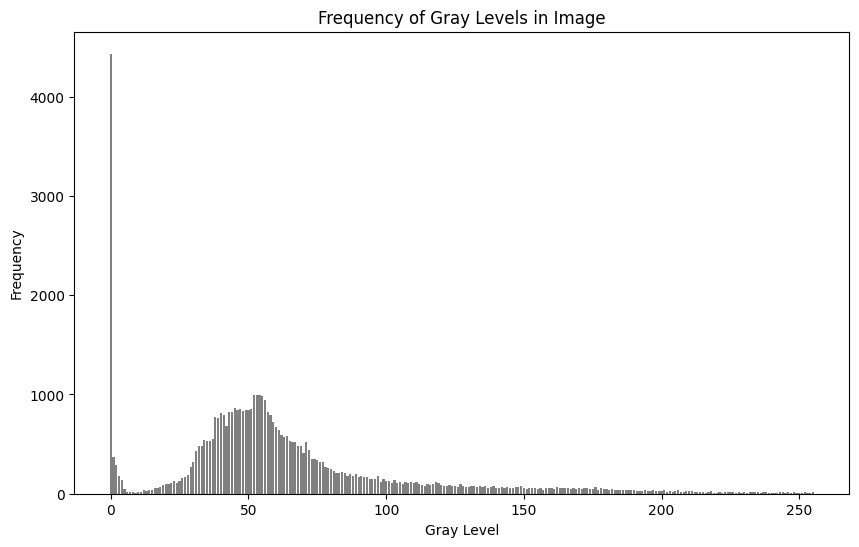

In [16]:

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(fre.keys(), fre.values(), color='gray')

# Label the axes and title the plot
plt.xlabel('Gray Level')
plt.ylabel('Frequency')
plt.title('Frequency of Gray Levels in Image')

# Display the plot
plt.show()

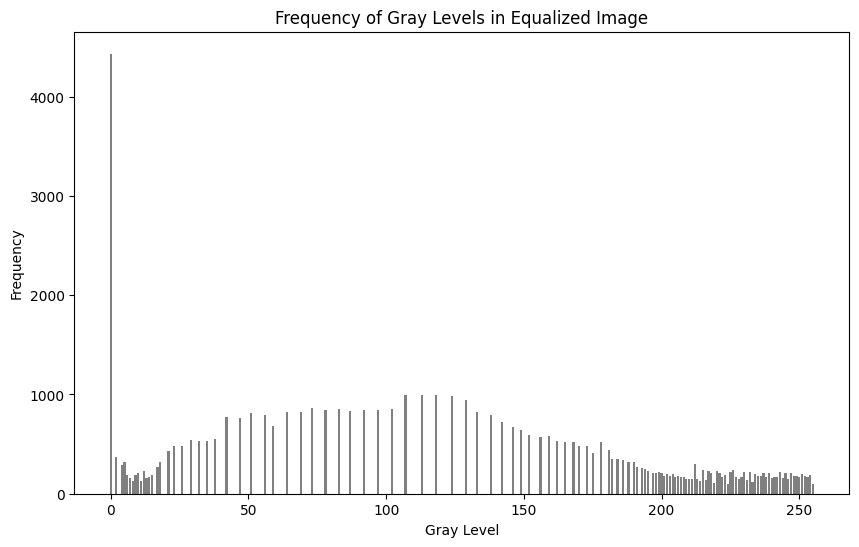

In [17]:
equalized_image = cv2.equalizeHist(image)
unique_gray_levels, counts = np.unique(equalized_image, return_counts=True)
fre = dict(zip(unique_gray_levels, counts))

# Create a bar plot for the equalized image
plt.figure(figsize=(10, 6))
plt.bar(fre.keys(), fre.values(), color='gray')

# Label the axes and title the plot
plt.xlabel('Gray Level')
plt.ylabel('Frequency')
plt.title('Frequency of Gray Levels in Equalized Image')

# Display the plot
plt.show()

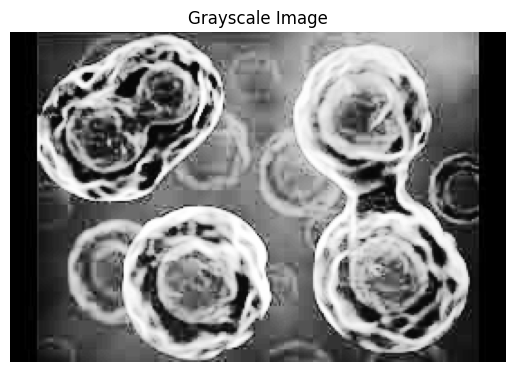

In [18]:
plt.imshow(equalized_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')  # Hide axis
plt.show()

## Thuật toán OTSU

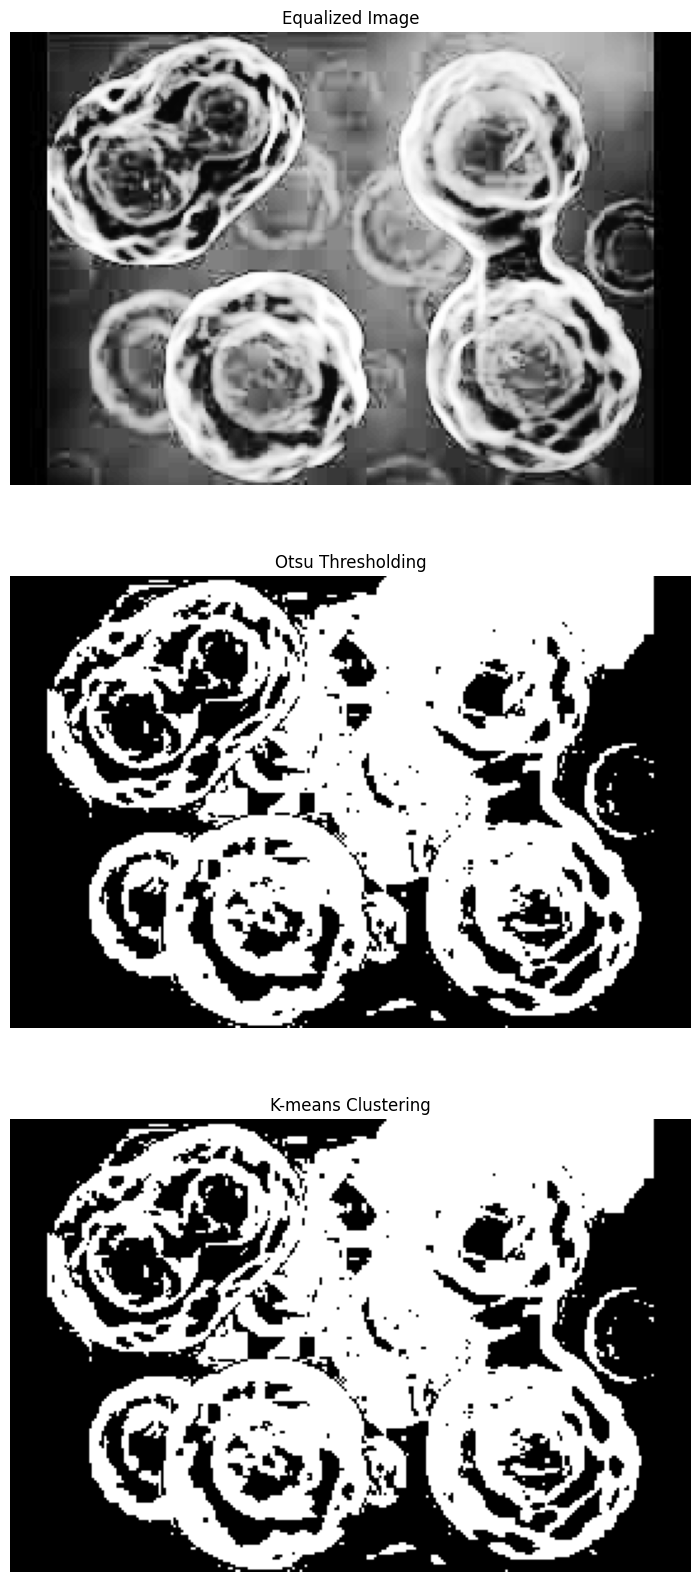

In [19]:

# Áp dụng thuật toán Otsu để phân ngưỡng
_, otsu_threshold = cv2.threshold(equalized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Áp dụng thuật toán K-means clustering để phân vùng
Z = equalized_image.reshape((-1, 1))
Z = np.float32(Z)

# Tiêu chí dừng và số lượng cluster
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2  # Số lượng cluster
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Chuyển đổi lại ảnh từ kết quả K-means
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape((equalized_image.shape))

# Hiển thị kết quả
plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(3, 1, 2)
plt.imshow(otsu_threshold, cmap='gray')
plt.title('Otsu Thresholding')
plt.axis('off')

plt.subplot(3, 1, 3)
plt.imshow(segmented_image, cmap='gray')
plt.title('K-means Clustering')
plt.axis('off')

plt.show()

# Phân vùng ảnh dựa vào miền


In [30]:
image = cv2.imread('../data/coin.jpg', cv2.IMREAD_GRAYSCALE)


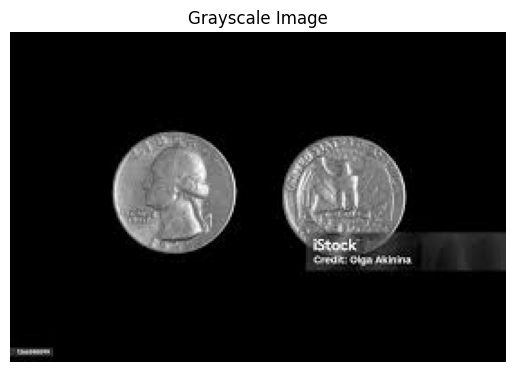

In [31]:
if image is None:
    print("Error: Could not load image.")
else:
    plt.imshow(image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()

In [35]:
gray_level,frequency = np.unique(image, return_counts=True)
fre = dict(zip(gray_level, frequency))
fre

{0: 39543,
 1: 327,
 2: 267,
 3: 184,
 4: 124,
 5: 83,
 6: 117,
 7: 75,
 8: 62,
 9: 47,
 10: 48,
 11: 42,
 12: 33,
 13: 28,
 14: 34,
 15: 34,
 16: 28,
 17: 33,
 18: 36,
 19: 34,
 20: 30,
 21: 35,
 22: 36,
 23: 38,
 24: 27,
 25: 42,
 26: 51,
 27: 55,
 28: 72,
 29: 54,
 30: 89,
 31: 56,
 32: 66,
 33: 43,
 34: 52,
 35: 54,
 36: 66,
 37: 38,
 38: 47,
 39: 33,
 40: 51,
 41: 44,
 42: 74,
 43: 49,
 44: 35,
 45: 49,
 46: 30,
 47: 36,
 48: 35,
 49: 61,
 50: 64,
 51: 19,
 52: 27,
 53: 27,
 54: 17,
 55: 13,
 56: 17,
 57: 15,
 58: 14,
 59: 18,
 60: 11,
 61: 12,
 62: 15,
 63: 11,
 64: 13,
 65: 11,
 66: 15,
 67: 9,
 68: 8,
 69: 13,
 70: 12,
 71: 7,
 72: 12,
 73: 7,
 74: 11,
 75: 9,
 76: 11,
 77: 13,
 78: 7,
 79: 20,
 80: 6,
 81: 15,
 82: 16,
 83: 11,
 84: 12,
 85: 20,
 86: 9,
 87: 14,
 88: 21,
 89: 20,
 90: 19,
 91: 11,
 92: 12,
 93: 25,
 94: 23,
 95: 24,
 96: 26,
 97: 29,
 98: 25,
 99: 27,
 100: 22,
 101: 41,
 102: 30,
 103: 35,
 104: 50,
 105: 55,
 106: 46,
 107: 44,
 108: 55,
 109: 67,
 110: 56,


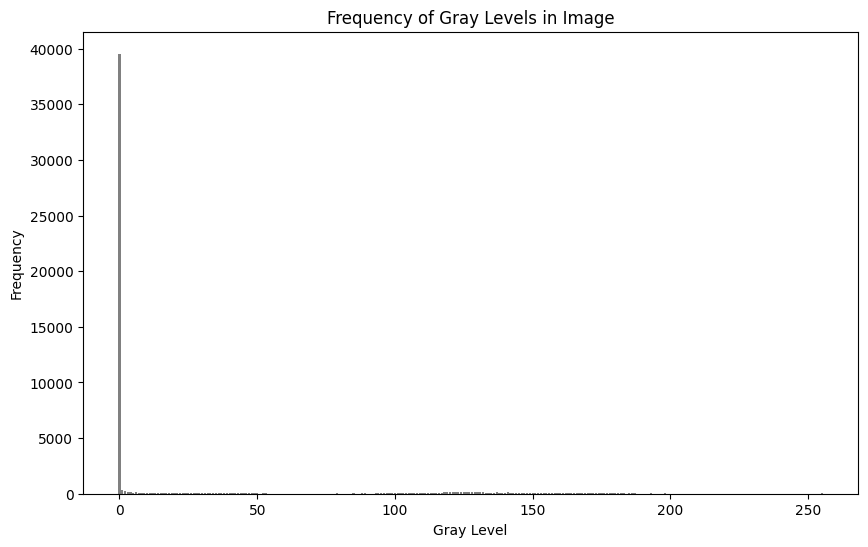

In [36]:
# Create a bar plot for the gray levels and their frequencies
plt.figure(figsize=(10, 6))
plt.bar(fre.keys(), fre.values(), color='gray')

# Label the axes and title the plot
plt.xlabel('Gray Level')
plt.ylabel('Frequency')
plt.title('Frequency of Gray Levels in Image')

# Display the plot
plt.show()

(-0.5, 274.5, 182.5, -0.5)

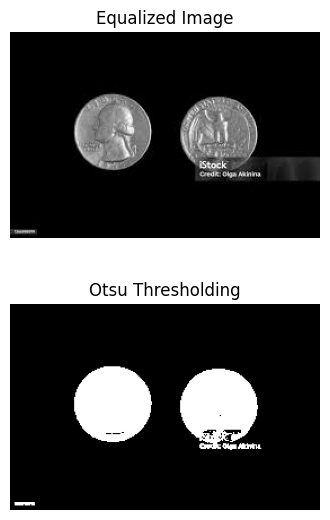

In [27]:
_, otsu_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Hiển thị kết quả
plt.figure(figsize=(4, 10))

plt.subplot(3, 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(3, 1, 2)
plt.imshow(otsu_threshold, cmap='gray')
plt.title('Otsu Thresholding')
plt.axis('off')